In [1]:
import numpy as np
import cv2
import os
import glob
import matplotlib as plt

file0 = glob.glob('/home/nbuser/train/c0/*.jpg')
file1 = glob.glob('/home/nbuser/train/c1/*.jpg')
file2 = glob.glob('/home/nbuser/train/c2/*.jpg')
file3 = glob.glob('/home/nbuser/train/c3/*.jpg')
file4 = glob.glob('/home/nbuser/train/c4/*.jpg')
file5 = glob.glob('/home/nbuser/train/c5/*.jpg')
file6 = glob.glob('/home/nbuser/train/c6/*.jpg')
file7 = glob.glob('/home/nbuser/train/c7/*.jpg')
file8 = glob.glob('/home/nbuser/train/c8/*.jpg')
file9 = glob.glob('/home/nbuser/train/c9/*.jpg')

folders = [file0, file1, file2, file3, file4, file5, file6, file7, file8,file9]
data = []
count = 0
for f in folders:
    print("File " + str(count))
    count += 1
    files = f
    for f1 in files:
        img = cv2.imread(f1,0)
        edges = cv2.Canny(img, 50,100)
        rs = cv2.resize(edges, (int(edges.shape[1]/4), int(edges.shape[0]/4)), interpolation = cv2.INTER_AREA)
        
        data.append(rs)
    
X = np.asarray(data)
X_train = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1).astype( 'float32' )
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )

File 0
File 1
File 2
File 3
File 4
File 5
File 6
File 7
File 8
File 9


In [2]:
from keras.utils import to_categorical
a0 = np.empty(len(file0))
a0.fill(0)
a1 = np.empty(len(file1))
a1.fill(1)
a2 = np.empty(len(file2))
a2.fill(2)
a3 = np.empty(len(file3))
a3.fill(3)
a4 = np.empty(len(file4))
a4.fill(4)
a5 = np.empty(len(file5))
a5.fill(5)
a6 = np.empty(len(file6))
a6.fill(6)
a7 = np.empty(len(file7))
a7.fill(7)
a8 = np.empty(len(file8))
a8.fill(8)
a9 = np.empty(len(file9))
a9.fill(9)

y = np.concatenate([a0, a1, a2, a3, a4, a5, a6, a7, a8, a9])
y = to_categorical(y)
num_classes = y.shape[1]
X_train = X_train/255

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.20, random_state=42)

Train on 17939 samples, validate on 4485 samples
Epoch 1/30
 - 46s - loss: 1.3845 - acc: 0.6144 - val_loss: 0.4558 - val_acc: 0.9231
Epoch 2/30
 - 42s - loss: 0.6303 - acc: 0.9324 - val_loss: 0.2721 - val_acc: 0.9819
Epoch 3/30
 - 42s - loss: 0.4134 - acc: 0.9731 - val_loss: 0.2207 - val_acc: 0.9911
Epoch 4/30
 - 42s - loss: 0.3059 - acc: 0.9870 - val_loss: 0.1569 - val_acc: 0.9935
Epoch 5/30
 - 42s - loss: 0.2415 - acc: 0.9915 - val_loss: 0.1353 - val_acc: 0.9951
Epoch 6/30
 - 42s - loss: 0.1946 - acc: 0.9950 - val_loss: 0.1270 - val_acc: 0.9964
Epoch 7/30
 - 42s - loss: 0.1598 - acc: 0.9969 - val_loss: 0.1086 - val_acc: 0.9973
Epoch 8/30
 - 42s - loss: 0.1355 - acc: 0.9976 - val_loss: 0.0806 - val_acc: 0.9971
Epoch 9/30
 - 42s - loss: 0.1127 - acc: 0.9984 - val_loss: 0.0769 - val_acc: 0.9978
Epoch 10/30
 - 42s - loss: 0.0998 - acc: 0.9982 - val_loss: 0.0625 - val_acc: 0.9978
Epoch 11/30
 - 42s - loss: 0.0849 - acc: 0.9987 - val_loss: 0.0550 - val_acc: 0.9975
Epoch 12/30
 - 42s - loss

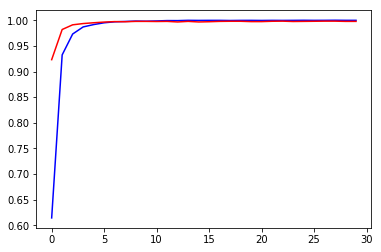

In [6]:
import numpy

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

def BN_model():

    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(120, 160, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(16, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    #model.add(Conv2D(16, 3))
    #model.add(BatchNormalization())
    #model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.2))
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# build the model
model = BN_model()

# Fit the model
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log.history['acc'],'b') 
plt.plot(log.history['val_acc'],'r')
plt.show()

In [ ]:
test_array = []
image_label = []
file_test = glob.glob('/home/nbuser/test/*.jpg')
#count = 0
for f1 in file_test:
        #print("File " + str(count)),
        #count += 1
        
        img = cv2.imread(f1,0)
        edges = cv2.Canny(img, 50,100)
        rs = cv2.resize(edges, (int(edges.shape[1]/4), int(edges.shape[0]/4)), interpolation = cv2.INTER_AREA)
        test_array.append(rs)
        image_label.append(os.path.join(f1))
        

test_X = np.asarray(test_array)



In [19]:
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2], 1).astype( 'float32' )

test_X = test_X/255

In [20]:
submit_array = model.predict(test_X)

In [34]:
submit_array[13]

array([0.12056423, 0.15803914, 0.02209915, 0.42707348, 0.00466982,
       0.00619603, 0.00623075, 0.05624879, 0.13503623, 0.06384237],
      dtype=float32)

In [32]:
image_label[1304]

'/home/nbuser/test/img_65802.jpg'

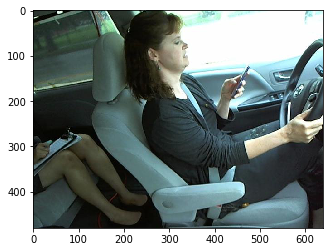

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

pic = plt.imread(image_label[13])
plt.imshow(pic)

In [50]:
import numpy as np
import pandas as pd
names = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
path = '/home/nbuser'
rows = os.listdir(path +'/test')

df = pd.DataFrame(submit_array, index=rows, columns=names)
df.to_csv('df.csv', index=False, header=False, sep=',')

In [51]:
df.to_csv

<bound method DataFrame.to_csv of                       c0        c1        c2        c3        c4        c5  \
img_50655.jpg   0.046867  0.359156  0.027148  0.111061  0.021057  0.024215   
img_1497.jpg    0.426796  0.099221  0.103928  0.020174  0.040977  0.059764   
img_86115.jpg   0.026447  0.026811  0.009574  0.486092  0.057301  0.040146   
img_47640.jpg   0.000741  0.001134  0.001997  0.000496  0.000524  0.001012   
img_28056.jpg   0.293959  0.170025  0.020771  0.029998  0.090359  0.038372   
img_34617.jpg   0.004886  0.281041  0.016368  0.008837  0.010283  0.003691   
img_94134.jpg   0.112000  0.023288  0.005082  0.024583  0.053811  0.007661   
img_42636.jpg   0.017247  0.039253  0.087100  0.004819  0.033988  0.399397   
img_10022.jpg   0.003515  0.951922  0.001802  0.011835  0.001815  0.003470   
img_68689.jpg   0.023423  0.413589  0.105755  0.013090  0.013141  0.135096   
img_36075.jpg   0.020263  0.238131  0.566001  0.005991  0.008822  0.007068   
img_83998.jpg   0.057303  0.06

In [40]:
submit_array.shape

(79726, 10)

In [2]:
import os
path = '/home/nbuser'
column = os.listdir(path +'/test')